In [2]:
import pandas as pd
datapath="初賽資料/acct_transaction.csv"
df_csv = pd.read_csv(datapath)
print(df_csv.head())

                                           from_acct  from_acct_type  \
0  be6fdd2d0f9aa02b0b09436fb137654942e3346e16ab43...               1   
1  18f3d0e79217f8bc8b4cb485f9f80a884771b846de652f...               1   
2  302f3911cbf56bf9b5ad209a4b045a82380f98d92604c1...               1   
3  5a4809796865b1526f46e5dda6a35c1a4def3cbe969cc8...               1   
4  7f84214987bdee16ffbaf3d70824e6385ce80e032a24c5...               1   

                                             to_acct  to_acct_type  \
0  7abb16ac9bddc1f464981131ba68506775a964df2e0734...             1   
1  e77e425fb5f3ece7a7b431b3c43cc1d040f3054e35479d...             2   
2  4a707a0af2aa824777082803013610090033104c308023...             1   
3  d16b1bf33802f020b508002755c13aad549bc59dde7aae...             2   
4  c2e0f75b54f394b29755779ab9a488931e9d893a0e5f8f...             1   

  is_self_txn    txn_amt  txn_date  txn_time currency_type channel_type  
0           N    47500.0        71  05:05:00           TWD           04 

In [3]:
alertpath="初賽資料/acct_alert.csv"
alertdf_csv = pd.read_csv(alertpath)
print(alertdf_csv.head())

                                                acct  event_date
0  80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d...          87
1  b8c11db05d00b5ac66be10ffee5f6ce6ef9221c733a4bb...          19
2  daa05c68b290ac3cc522abad400c5304dffba07baa232c...          81
3  174e26ecc9cee56aaaca855c743a106275c58629740a49...          88
4  007cf5c98aa4f9f3e444c9cdaca74d0f7542e9a2804201...         117


In [4]:
predictpath="初賽資料/acct_predict.csv"
predictdf_csv = pd.read_csv(predictpath)
print(predictdf_csv.head())

                                                acct  label
0  fcf31c5113d3dbd9cb5056045c6a0f213bd8a4fc1bc834...      0
1  e21dfa45e990364194468e501fbfe52ec02a4b71a2e2e8...      0
2  2552e943aaf9caa33183758cd40128ef20a6e6ff16c232...      0
3  71700e7b7c3d40abdfdbcc7afc0752fa8d9bd28b408651...      0
4  c70349fc718ffb88f03f31b5a7fcf65b33dd71dce6fee0...      0


In [5]:
df_csv['currency_type'].value_counts()

currency_type
TWD    4382571
USD      23458
JPY      21545
CNY       2888
EUR       2233
HKD       1007
AUD        752
GBP        357
CAD        255
NZD        202
THB        199
ZAR        176
SGD        134
CHF         91
SEK         14
MXN          8
Name: count, dtype: int64

In [6]:
exchange_rate = {"TWD": 1,"USD": 30.4,"JPY": 0.21,"CNY": 4.27,"EUR": 35.71,"HKD": 3.91,"AUD": 20.07,"GBP": 40.97,
                 "CAD": 21.79,"NZD": 18.87,"THB": 1.18,"ZAR": 1.67,"SGD": 22.22,"CHF": 34.48,"SEK": 3.33,"MXN": 1.67}

df_csv['txn_amt_twd'] = df_csv.apply(lambda x: x['txn_amt'] * exchange_rate.get(x['currency_type'], 1), axis=1)
df_csv = df_csv.drop(columns=['txn_amt'])

In [7]:
import pandas as pd


df_csv['txn_time_dt'] = pd.to_datetime(df_csv['txn_time'], format='%H:%M:%S')

# 轉成小時，分鐘四捨五入
df_csv['txn_hours'] = df_csv['txn_time_dt'].dt.hour + (df_csv['txn_time_dt'].dt.minute / 60)
df_csv['txn_hours'] = df_csv['txn_hours'].round()

# 刪除中間欄位
df_csv = df_csv.drop(columns=['txn_time_dt','txn_time','currency_type'])


print(df_csv.head())

                                           from_acct  from_acct_type  \
0  be6fdd2d0f9aa02b0b09436fb137654942e3346e16ab43...               1   
1  18f3d0e79217f8bc8b4cb485f9f80a884771b846de652f...               1   
2  302f3911cbf56bf9b5ad209a4b045a82380f98d92604c1...               1   
3  5a4809796865b1526f46e5dda6a35c1a4def3cbe969cc8...               1   
4  7f84214987bdee16ffbaf3d70824e6385ce80e032a24c5...               1   

                                             to_acct  to_acct_type  \
0  7abb16ac9bddc1f464981131ba68506775a964df2e0734...             1   
1  e77e425fb5f3ece7a7b431b3c43cc1d040f3054e35479d...             2   
2  4a707a0af2aa824777082803013610090033104c308023...             1   
3  d16b1bf33802f020b508002755c13aad549bc59dde7aae...             2   
4  c2e0f75b54f394b29755779ab9a488931e9d893a0e5f8f...             1   

  is_self_txn  txn_date channel_type  txn_amt_twd  txn_hours  
0           N        71           04      47500.0        5.0  
1         UNK       

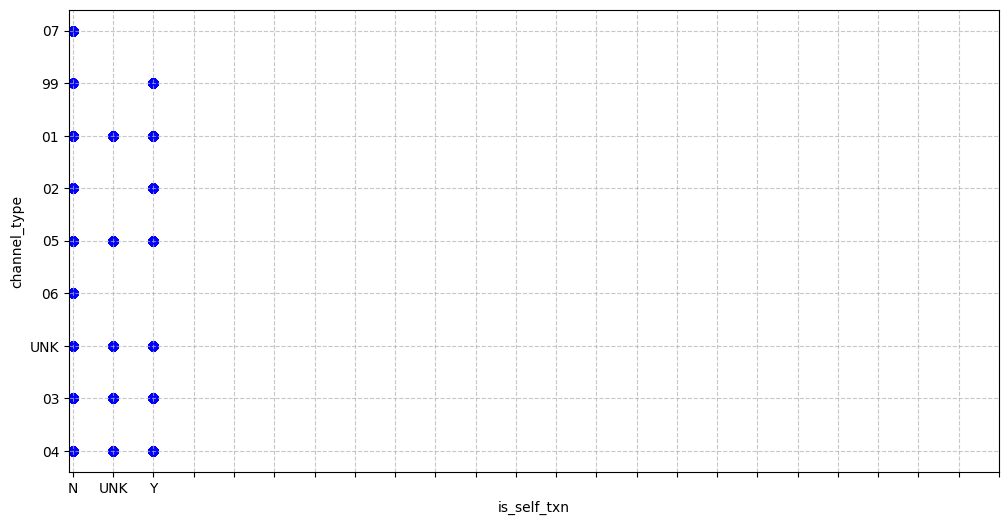

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(df_csv['is_self_txn'], df_csv['channel_type'], alpha=0.5, color='blue')
plt.xlabel('is_self_txn')
plt.ylabel('channel_type')
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()




In [9]:
#無意義行
print(df_csv['is_self_txn'].value_counts())
print(df_csv['channel_type'].value_counts())

is_self_txn
UNK    3346272
N       943713
Y       145905
Name: count, dtype: int64
channel_type
03     2008166
UNK    1701739
04      595522
06       58445
01       51364
02       15458
05        3505
99        1281
07         410
Name: count, dtype: int64


In [10]:
df_csv=df_csv.drop(labels=['is_self_txn'], axis=1)

In [11]:
df_csv

,from_acct,from_acct_type,to_acct,to_acct_type,txn_date,channel_type,txn_amt_twd,txn_hours
0,be6fdd2d0f9aa02b0b09436fb137654942e3346e16ab43...,1,7abb16ac9bddc1f464981131ba68506775a964df2e0734...,1,71,04,47500.0,5.0
1,18f3d0e79217f8bc8b4cb485f9f80a884771b846de652f...,1,e77e425fb5f3ece7a7b431b3c43cc1d040f3054e35479d...,2,31,03,6150.0,21.0
2,302f3911cbf56bf9b5ad209a4b045a82380f98d92604c1...,1,4a707a0af2aa824777082803013610090033104c308023...,1,37,04,1150000.0,9.0
3,5a4809796865b1526f46e5dda6a35c1a4def3cbe969cc8...,1,d16b1bf33802f020b508002755c13aad549bc59dde7aae...,2,106,04,8550.0,14.0
4,7f84214987bdee16ffbaf3d70824e6385ce80e032a24c5...,1,c2e0f75b54f394b29755779ab9a488931e9d893a0e5f8f...,1,84,03,1450.0,11.0
...,...,...,...,...,...,...,...,...
4435885,a8e4855e85cbd465b2f643bae62956e4b982ab20708000...,1,ba45be62c9cb05d0f43169f6958c1870b0500fa0abc48b...,2,87,03,285.0,17.0
4435886,fad742556efbb90f999fea49b0a212c2ac12a7baf71869...,1,49775a8223d99b07dc975ccda5c2f7a8c84088a4717610...,2,55,03,505.0,22.0
4435887,d5f8cf2a8beebb2ae627c506d661826b555e19b74a5efb...,2,f8fff2b79f98d937b3991ea5736c6bab99b9999a6bb732...,1,95,UNK,1150.0,13.0
4435888,64e579f4be2d77d38e931391eb6b791e1adf576f273a44...,2,8a6aab8bf9e36d0dd5ea481c923c3979c54e9401cc6a9d...,2,23,06,1050.0,19.0


In [12]:
import pandas as pd

alert_accounts = set(alertdf_csv['acct'])

# 處理 from_acct
from_df = df_csv.copy()
from_df = from_df.rename(columns={
    'from_acct': 'acct',
    'from_acct_type': 'acct_type'
})
# 從帳戶的 txn_amt 取負值
from_df['txn_amt_twd'] = -from_df['txn_amt_twd']
from_df['label'] = from_df['acct'].apply(lambda x: 1 if x in alert_accounts else 0)
from_df = from_df[['acct', 'acct_type', 'txn_date', 'channel_type', 'txn_amt_twd', 'txn_hours', 'label']]

# 處理 to_acct
to_df = df_csv.copy()
to_df = to_df.rename(columns={
    'to_acct': 'acct',
    'to_acct_type': 'acct_type'
})
# 收帳戶 txn_amt 保持正值
to_df['label'] = to_df['acct'].apply(lambda x: 1 if x in alert_accounts else 0)
to_df = to_df[['acct', 'acct_type', 'txn_date', 'channel_type', 'txn_amt_twd', 'txn_hours', 'label']]

# 合併 from 與 to
result_df = pd.concat([from_df, to_df], ignore_index=True)

# 查看結果
print(result_df.head())



                                                acct  acct_type  txn_date  \
0  be6fdd2d0f9aa02b0b09436fb137654942e3346e16ab43...          1        71   
1  18f3d0e79217f8bc8b4cb485f9f80a884771b846de652f...          1        31   
2  302f3911cbf56bf9b5ad209a4b045a82380f98d92604c1...          1        37   
3  5a4809796865b1526f46e5dda6a35c1a4def3cbe969cc8...          1       106   
4  7f84214987bdee16ffbaf3d70824e6385ce80e032a24c5...          1        84   

  channel_type  txn_amt_twd  txn_hours  label  
0           04     -47500.0        5.0      0  
1           03      -6150.0       21.0      0  
2           04   -1150000.0        9.0      0  
3           04      -8550.0       14.0      0  
4           03      -1450.0       11.0      0  


In [13]:
result_df

,acct,acct_type,txn_date,channel_type,txn_amt_twd,txn_hours,label
0,be6fdd2d0f9aa02b0b09436fb137654942e3346e16ab43...,1,71,04,-47500.0,5.0,0
1,18f3d0e79217f8bc8b4cb485f9f80a884771b846de652f...,1,31,03,-6150.0,21.0,0
2,302f3911cbf56bf9b5ad209a4b045a82380f98d92604c1...,1,37,04,-1150000.0,9.0,0
3,5a4809796865b1526f46e5dda6a35c1a4def3cbe969cc8...,1,106,04,-8550.0,14.0,0
4,7f84214987bdee16ffbaf3d70824e6385ce80e032a24c5...,1,84,03,-1450.0,11.0,0
...,...,...,...,...,...,...,...
8871775,ba45be62c9cb05d0f43169f6958c1870b0500fa0abc48b...,2,87,03,285.0,17.0,0
8871776,49775a8223d99b07dc975ccda5c2f7a8c84088a4717610...,2,55,03,505.0,22.0,0
8871777,f8fff2b79f98d937b3991ea5736c6bab99b9999a6bb732...,1,95,UNK,1150.0,13.0,0
8871778,8a6aab8bf9e36d0dd5ea481c923c3979c54e9401cc6a9d...,2,23,06,1050.0,19.0,0


In [14]:
channel_unique = result_df['channel_type'].unique()
channel_map = {k: i for i, k in enumerate(channel_unique)}
result_df['channel_type'] = result_df['channel_type'].map(channel_map)
result_df

,acct,acct_type,txn_date,channel_type,txn_amt_twd,txn_hours,label
0,be6fdd2d0f9aa02b0b09436fb137654942e3346e16ab43...,1,71,0,-47500.0,5.0,0
1,18f3d0e79217f8bc8b4cb485f9f80a884771b846de652f...,1,31,1,-6150.0,21.0,0
2,302f3911cbf56bf9b5ad209a4b045a82380f98d92604c1...,1,37,0,-1150000.0,9.0,0
3,5a4809796865b1526f46e5dda6a35c1a4def3cbe969cc8...,1,106,0,-8550.0,14.0,0
4,7f84214987bdee16ffbaf3d70824e6385ce80e032a24c5...,1,84,1,-1450.0,11.0,0
...,...,...,...,...,...,...,...
8871775,ba45be62c9cb05d0f43169f6958c1870b0500fa0abc48b...,2,87,1,285.0,17.0,0
8871776,49775a8223d99b07dc975ccda5c2f7a8c84088a4717610...,2,55,1,505.0,22.0,0
8871777,f8fff2b79f98d937b3991ea5736c6bab99b9999a6bb732...,1,95,2,1150.0,13.0,0
8871778,8a6aab8bf9e36d0dd5ea481c923c3979c54e9401cc6a9d...,2,23,3,1050.0,19.0,0


In [15]:
print(result_df['channel_type'].value_counts())

channel_type
1    4016332
2    3403478
0    1191044
3     116890
6     102728
5      30916
4       7010
7       2562
8        820
Name: count, dtype: int64


In [16]:
print(result_df['label'].value_counts())

label
0    8837765
1      34015
Name: count, dtype: int64


In [17]:
result_df['channel_type'] = result_df['channel_type'].replace('UNK', '00')
result_df

,acct,acct_type,txn_date,channel_type,txn_amt_twd,txn_hours,label
0,be6fdd2d0f9aa02b0b09436fb137654942e3346e16ab43...,1,71,0,-47500.0,5.0,0
1,18f3d0e79217f8bc8b4cb485f9f80a884771b846de652f...,1,31,1,-6150.0,21.0,0
2,302f3911cbf56bf9b5ad209a4b045a82380f98d92604c1...,1,37,0,-1150000.0,9.0,0
3,5a4809796865b1526f46e5dda6a35c1a4def3cbe969cc8...,1,106,0,-8550.0,14.0,0
4,7f84214987bdee16ffbaf3d70824e6385ce80e032a24c5...,1,84,1,-1450.0,11.0,0
...,...,...,...,...,...,...,...
8871775,ba45be62c9cb05d0f43169f6958c1870b0500fa0abc48b...,2,87,1,285.0,17.0,0
8871776,49775a8223d99b07dc975ccda5c2f7a8c84088a4717610...,2,55,1,505.0,22.0,0
8871777,f8fff2b79f98d937b3991ea5736c6bab99b9999a6bb732...,1,95,2,1150.0,13.0,0
8871778,8a6aab8bf9e36d0dd5ea481c923c3979c54e9401cc6a9d...,2,23,3,1050.0,19.0,0


In [19]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
import pandas as pd

# 假設 result_df 已經讀入
feature_cols = [
    'acct_type',     # 帳號類型（數值）
    'txn_date',      # 交易日期或天數
    'channel_type',  # 交易通路（已經映射成 0~9）
    'txn_amt_twd',   # 交易金額
    'txn_hours'      # 交易時間（小時）
]

# 訓練集：只用 label=1
X_train = result_df[result_df['label']==1][feature_cols]

# 建立 IsolationForest
clf = IsolationForest(n_estimators=200, contamination=0.01, random_state=42)
clf.fit(X_train)

# ---------------------------
# 驗證集混淆矩陣（文字版）
# ---------------------------
df_val_pos = result_df[result_df['label']==1].sample(n=1000, random_state=42)
df_val_neg = result_df[result_df['label']==0].sample(n=1000, random_state=42)
df_val = pd.concat([df_val_pos, df_val_neg])

X_val = df_val[feature_cols]
y_true = df_val['label']

y_val_pred = clf.predict(X_val)
y_val_pred = (y_val_pred == -1).astype(int)  # 異常標為 1

# 計算混淆矩陣
cm = confusion_matrix(y_true, y_val_pred)
print("Confusion Matrix:")
print("         Pred 0    Pred 1")
print(f"True 0   {cm[0,0]:6}   {cm[0,1]:6}")
print(f"True 1   {cm[1,0]:6}   {cm[1,1]:6}")

# ---------------------------
# 預測待測帳號並生成提交檔（根據帳號過去活動）
# ---------------------------
predictpath = "初賽資料/acct_predict.csv"
predictdf_csv = pd.read_csv(predictpath)
print(predictdf_csv.head())

# 取出 predict 帳號的交易歷史
acct_history = result_df[result_df['acct'].isin(predictdf_csv['acct'])]

# 對每筆交易做預測
X_test = acct_history[feature_cols].fillna(0)
y_pred = clf.predict(X_test)
y_pred = (y_pred == -1).astype(int)

# 每個帳號取最大值作為帳號級標籤（1 = 異常，0 = 正常）
acct_history['pred'] = y_pred
df_submit = acct_history.groupby('acct')['pred'].max().reset_index()
df_submit.rename(columns={'pred':'label'}, inplace=True)

# 確保提交帳號順序與 predictdf_csv 一致
df_submit = predictdf_csv[['acct']].merge(df_submit, on='acct', how='left').fillna(0)
df_submit['label'] = df_submit['label'].astype(int)

df_submit.to_csv("isolationforest_submit.csv", index=False)
print("Submit CSV 已生成")


Confusion Matrix:
         Pred 0    Pred 1
True 0      971       29
True 1      990       10
                                                acct  label
0  fcf31c5113d3dbd9cb5056045c6a0f213bd8a4fc1bc834...      0
1  e21dfa45e990364194468e501fbfe52ec02a4b71a2e2e8...      0
2  2552e943aaf9caa33183758cd40128ef20a6e6ff16c232...      0
3  71700e7b7c3d40abdfdbcc7afc0752fa8d9bd28b408651...      0
4  c70349fc718ffb88f03f31b5a7fcf65b33dd71dce6fee0...      0
Submit CSV 已生成


C:\Users\User\AppData\Local\Temp\ipykernel_1168\2334767142.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acct_history['pred'] = y_pred
